In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression


In [38]:
# Read the csv file into a pandas DataFrame
pitchers = pd.read_csv('data/smart_fantasy/pitchers_FG_smartfantasy.csv')
hitters = pd.read_csv('data/smart_fantasy/hitters_FG_smartfantasy_dup.csv')

## Top 30 Hitters 3-year Model

R2 Score: 0.47455557084129596
R2 Score: 0.524157681324234
R2 Score: 0.5033219356934611
R2 Score: 0.5224281776728751
R2 Score: 0.4231849149309389
 coef [[-8.90045674e-01 -2.40546610e+01 -4.13622846e+00  1.19852063e+01
  -2.79887267e-02  1.18509346e-01 -6.72725150e-02  3.80071106e-03
   2.51618737e+01  5.71880573e+01  2.89964952e+01  1.96127587e+01
  -1.39691330e+01 -2.16188768e+01 -1.27028593e+01  5.71909511e+00
   1.27145040e-01  1.40841856e-01 -2.61282964e-01  3.10625289e-02
  -2.95302068e-02 -6.71259783e+01  1.37188598e+01  2.16170358e+01
   6.57116151e-02  5.48287819e-02  3.85033049e-01 -7.70053930e+01
  -1.37859281e+01]]
 int [39.8831994]


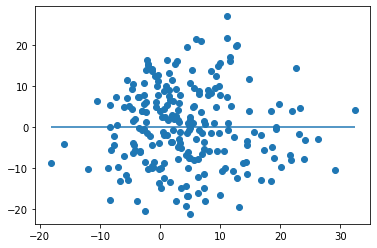

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     5.009
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           2.37e-12
Time:                        10:36:07   Log-Likelihood:                -840.44
No. Observations:                 228   AIC:                             1741.
Df Residuals:                     198   BIC:                             1844.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                39.8832     45.26

,value,name,age_x,o_swingpercen_x,o_contactpercen_x,z_swingpercen_x,z_contactpercen_x,ops_x,r_x,rbi_x,...,pa,kpercen,bbpercen,iffbpercen,predictions,predictions_ranks,razz_ranks,avg,adp_ranks,rating_diff
0,39.74,Christian Yelich,24,0.229,0.540,0.643,0.884,0.859,78,98,...,651,0.207,0.104,0.049,29.125670,2.0,1.0,0.329,225.5,223.5
1,32.66,Jonathan Villar,25,0.241,0.575,0.662,0.831,0.826,92,63,...,515,0.268,0.080,0.103,13.077386,31.0,2.0,0.274,165.0,134.0
2,31.77,Trevor Story,23,0.279,0.562,0.667,0.807,0.909,67,72,...,656,0.256,0.072,0.102,23.997908,5.0,3.0,0.294,202.0,197.0
3,31.72,Anthony Rendon,26,0.228,0.750,0.648,0.888,0.797,91,85,...,597,0.137,0.092,0.106,18.443287,18.0,4.0,0.319,223.0,205.0
4,29.97,Freddie Freeman,26,0.324,0.601,0.807,0.794,0.968,102,91,...,707,0.187,0.107,0.019,20.086210,12.0,5.0,0.295,205.5,193.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,-16.88,Josh Harrison,28,0.371,0.779,0.725,0.846,0.699,57,59,...,374,0.182,0.048,0.107,-10.486766,225.0,224.0,0.175,14.0,-211.0
224,-17.04,Chris Owings,24,0.358,0.646,0.688,0.895,0.731,52,49,...,309,0.243,0.078,0.127,-5.562036,210.0,225.0,0.139,3.0,-207.0
225,-17.22,Yangervis Solarte,28,0.357,0.745,0.705,0.907,0.808,55,71,...,506,0.142,0.061,0.192,-2.029241,175.0,226.0,0.205,26.5,-148.5
226,-17.50,Scott Schebler,25,0.336,0.563,0.756,0.828,0.762,36,40,...,430,0.230,0.091,0.083,-2.080247,176.0,227.0,0.123,1.0,-175.0


In [39]:
years =['2012','2013','2014', '2015', '2016']
model = LinearRegression()
Hitters_Nineteen = hitters.loc[ (hitters['season']==2019)]
Hitters_Nineteen= Hitters_Nineteen[['name','avg']]
for year in years:
    SeasonOne = hitters.loc[ (hitters['season']==int(year))]
    SeasonTwo = hitters.loc[ (hitters['season']==(int(year)+1))]
    SeasonThree = hitters.loc[ (hitters['season']==(int(year)+2))]
    RazzSeason = hitters.loc[ (hitters['season']==(int(year)+3))]

    SeasonOne = SeasonOne[["name", 'age','o_swingpercen','o_contactpercen','z_swingpercen','z_contactpercen','ops','r',
                          'rbi', 'hr','sb', 'pa', 'kpercen','bbpercen','iffbpercen']]
    SeasonTwo = SeasonTwo[["name",'age','o_swingpercen','o_contactpercen','z_swingpercen','z_contactpercen','ops','r',
                          'rbi', 'hr','sb', 'pa', 'kpercen','bbpercen','iffbpercen']]
    SeasonThree = SeasonThree[["name",'age','o_swingpercen','o_contactpercen','z_swingpercen','z_contactpercen','ops','r',
                          'rbi', 'hr','sb', 'pa', 'kpercen','bbpercen','iffbpercen']]
    RazzSeason = RazzSeason[['value','name']].dropna()
    RazzSeason = RazzSeason.merge(SeasonOne , on='name')
    RazzSeason = RazzSeason.merge(SeasonTwo , on='name')
    RazzSeason = RazzSeason.merge(SeasonThree , on='name')
    X= RazzSeason[['age_y','o_swingpercen_x', 'o_contactpercen_x',
        'ops_x', 'rbi_x', 'hr_x',
       'sb_x', 'pa_x', 'kpercen_x', 'bbpercen_x', 'iffbpercen_x',
       'o_swingpercen_y', 'o_contactpercen_y', 'z_swingpercen_y',
       'z_contactpercen_y', 'ops_y', 'r_y', 'rbi_y', 'hr_y', 'sb_y', 'pa_y',
       'kpercen_y', 'bbpercen_y',  'ops',
       'rbi', 'hr', 'sb',  'bbpercen', 'iffbpercen']]
    y= RazzSeason[['value']].to_numpy()
    
    

    # Fitting our model with all of our features in X
    model.fit(X, y)
    score = model.score(X, y)

    print(f"R2 Score: {score}")
print(f" coef {model.coef_}")
print(f" int {model.intercept_}")
predictions = model.predict(X)
    # Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
    
predictions = model.predict(X)
RazzSeason['predictions']= predictions
RazzSeason['predictions_ranks'] =RazzSeason['predictions'].rank(ascending=False)
RazzSeason['razz_ranks'] =RazzSeason['value'].rank(ascending=False)

RazzSeason= RazzSeason.merge(Hitters_Nineteen, on='name')
RazzSeason['adp_ranks'] = RazzSeason['avg'].rank(ascending=True)
RazzSeason['rating_diff']= ( RazzSeason['adp_ranks'] - RazzSeason['predictions_ranks'])
RazzSeason

In [40]:
### 3 years of data starting in 2018 to get X values

year = '2018'
SeasonOne = hitters.loc[ (hitters['season']==int(year))]
SeasonTwo = hitters.loc[ (hitters['season']==(int(year)+1))]
RazzSeason = hitters.loc[ (hitters['season']==(int(year)+2))]

SeasonOne = SeasonOne[["name", 'age','o_swingpercen','o_contactpercen','z_swingpercen','z_contactpercen','ops','r',
                      'rbi', 'hr','sb', 'pa', 'kpercen','bbpercen','iffbpercen']]
SeasonTwo = SeasonTwo[["name",'age','o_swingpercen','o_contactpercen','z_swingpercen','z_contactpercen','ops','r',
                      'rbi', 'hr','sb', 'pa', 'kpercen','bbpercen','iffbpercen']]
SeasonThree = SeasonThree[["name",'age','o_swingpercen','o_contactpercen','z_swingpercen','z_contactpercen','ops','r',
                      'rbi', 'hr','sb', 'pa', 'kpercen','bbpercen','iffbpercen']]

RazzSeason = RazzSeason[['name']]

RazzSeason = RazzSeason.dropna()

RazzSeason = RazzSeason.merge(SeasonOne , on='name')
RazzSeason = RazzSeason.merge(SeasonTwo , on='name')
RazzSeason = RazzSeason.merge(SeasonThree , on='name')
X_test= RazzSeason[['age_y','o_swingpercen_x', 'o_contactpercen_x',
    'ops_x', 'rbi_x', 'hr_x',
   'sb_x', 'pa_x', 'kpercen_x', 'bbpercen_x', 'iffbpercen_x',
   'o_swingpercen_y', 'o_contactpercen_y', 'z_swingpercen_y',
   'z_contactpercen_y', 'ops_y', 'r_y', 'rbi_y', 'hr_y', 'sb_y', 'pa_y',
   'kpercen_y', 'bbpercen_y',  'ops',
   'rbi', 'hr', 'sb',  'bbpercen', 'iffbpercen']]

In [41]:
### Top 30 Hitters 3-year model
Twenty_One_Prediction = model.predict(X_test)
RazzSeason['predicted_val'] = Twenty_One_Prediction
RazzSeason['predictions_ranks'] =RazzSeason['predicted_val'].rank(ascending=False)
RazzSeason =RazzSeason.sort_values(by=['predictions_ranks'], ascending=True)
RazzSeason.head(30)

,name,age_x,o_swingpercen_x,o_contactpercen_x,z_swingpercen_x,z_contactpercen_x,ops_x,r_x,rbi_x,hr_x,...,r,rbi,hr,sb,pa,kpercen,bbpercen,iffbpercen,predicted_val,predictions_ranks
2,Mookie Betts,25,0.198,0.706,0.570,0.930,1.078,129,80,32,...,129,80,32,30,614,0.148,0.132,0.092,35.192747,1.0
11,Mike Trout,26,0.218,0.690,0.591,0.917,1.088,101,79,39,...,101,79,39,24,608,0.204,0.201,0.094,31.191761,2.0
1,Jose Ramirez,25,0.223,0.794,0.623,0.921,0.939,110,105,39,...,110,105,39,34,698,0.115,0.152,0.130,30.324877,3.0
49,Christian Yelich,26,0.277,0.622,0.646,0.881,1.000,118,110,36,...,118,110,36,22,651,0.207,0.104,0.049,28.830453,4.0
174,Alex Bregman,24,0.200,0.791,0.605,0.928,0.926,105,103,31,...,105,103,31,10,705,0.121,0.136,0.126,27.079855,5.0
33,Cody Bellinger,22,0.283,0.623,0.669,0.780,0.814,84,76,25,...,84,76,25,14,632,0.239,0.109,0.165,24.742260,6.0
9,Juan Soto,19,0.219,0.681,0.607,0.857,0.923,77,70,22,...,77,70,22,5,494,0.200,0.160,0.079,23.838773,7.0
0,Trea Turner,25,0.266,0.677,0.650,0.884,0.760,103,73,19,...,103,73,19,43,740,0.178,0.093,0.128,23.812476,8.0
7,Trevor Story,25,0.322,0.603,0.746,0.872,0.914,88,108,37,...,88,108,37,27,656,0.256,0.072,0.102,23.731783,9.0
19,Xander Bogaerts,25,0.301,0.658,0.613,0.893,0.883,72,103,23,...,72,103,23,8,580,0.176,0.095,0.108,22.083713,10.0


## Top 30 Hitters 2-year Model

R2 Score: 0.3933017431342559
 coef [[-8.62156651e-01 -6.39274022e+01 -4.70771203e+00 -1.20765014e+00
   7.18833071e-02  1.49171284e-01  5.81673823e-03 -3.20045131e-03
   9.09900010e+00 -4.51653244e+01 -4.14092929e+01  4.78185188e+01
  -4.45626079e+00  5.54323680e-01 -9.13707107e-01  5.46081606e+00
   1.48911435e-01  1.37283404e-01  2.85874102e-02  2.34143034e-01
  -1.82709745e-02 -4.34315698e+01]]
 int [33.09911672]


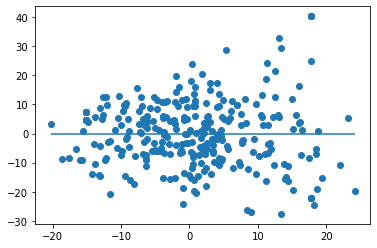

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     7.779
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           1.50e-18
Time:                        20:32:19   Log-Likelihood:                -1114.2
No. Observations:                 287   AIC:                             2274.
Df Residuals:                     264   BIC:                             2358.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                33.0991     46.34

In [12]:
## Two Year Model
years =['2012','2013','2014', '2015', '2016']
model = LinearRegression()
Hitters_Nineteen = hitters.loc[ (hitters['season']==2019)]
Hitters_Nineteen= Hitters_Nineteen[['name','avg']]
for year in years:
    SeasonOne = hitters.loc[ (hitters['season']==int(year))]
    SeasonTwo = hitters.loc[ (hitters['season']==(int(year)+1))]

    RazzSeason = hitters.loc[ (hitters['season']==(int(year)+2))]

    SeasonOne = SeasonOne[["name", 'age','o_swingpercen','o_contactpercen','z_swingpercen','z_contactpercen','ops','r',
                          'rbi', 'hr','sb', 'pa', 'kpercen','bbpercen','iffbpercen']]
    SeasonTwo = SeasonTwo[["name",'age','o_swingpercen','o_contactpercen','z_swingpercen','z_contactpercen','ops','r',
                          'rbi', 'hr','sb', 'pa', 'kpercen','bbpercen','iffbpercen']]
    RazzSeason = RazzSeason[['value','name']].dropna()
    RazzSeason = RazzSeason.merge(SeasonOne , on='name')
    RazzSeason = RazzSeason.merge(SeasonTwo , on='name')
    X= RazzSeason[['age_y','o_swingpercen_x', 'o_contactpercen_x',
        'ops_x', 'rbi_x', 'hr_x',
       'sb_x', 'pa_x', 'kpercen_x', 'bbpercen_x', 'iffbpercen_x',
       'o_swingpercen_y', 'o_contactpercen_y', 'z_swingpercen_y',
       'z_contactpercen_y', 'ops_y', 'r_y', 'rbi_y', 'hr_y', 'sb_y', 'pa_y',
       'kpercen_y']]
    y= RazzSeason[['value']].to_numpy()
    
    

    # Fitting our model with all of our features in X
    model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")
print(f" coef {model.coef_}")
print(f" int {model.intercept_}")
predictions = model.predict(X)
    # Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
    
predictions = model.predict(X)
RazzSeason['predictions']= predictions
RazzSeason['predictions_ranks'] =RazzSeason['predictions'].rank(ascending=False)
RazzSeason['razz_ranks'] =RazzSeason['value'].rank(ascending=False)

RazzSeason= RazzSeason.merge(Hitters_Nineteen, on='name')
RazzSeason['adp_ranks'] = RazzSeason['avg'].rank(ascending=True)
RazzSeason['rating_diff']= ( RazzSeason['adp_ranks'] - RazzSeason['predictions_ranks'])
hitters_ranked = RazzSeason



In [13]:
### Top 30 Hitters 2-year model Test
year = '2019'
SeasonOne = hitters.loc[ (hitters['season']==int(year))]
RazzSeason = hitters.loc[ (hitters['season']==(int(year)+1))]


SeasonOne = SeasonOne[["name", 'age','o_swingpercen','o_contactpercen','z_swingpercen','z_contactpercen','ops','r',
                      'rbi', 'hr','sb', 'pa', 'kpercen','bbpercen','iffbpercen']]
RazzSeason = RazzSeason[["name",'age','o_swingpercen','o_contactpercen','z_swingpercen','z_contactpercen','ops','r',
                      'rbi', 'hr','sb', 'pa', 'kpercen','bbpercen','iffbpercen']]



RazzSeason = RazzSeason.merge(SeasonOne , on='name')
X_test= RazzSeason[['age_y','o_swingpercen_x', 'o_contactpercen_x',
    'ops_x', 'rbi_x', 'hr_x',
   'sb_x', 'pa_x', 'kpercen_x', 'bbpercen_x', 'iffbpercen_x',
   'o_swingpercen_y', 'o_contactpercen_y', 'z_swingpercen_y',
   'z_contactpercen_y', 'ops_y', 'r_y', 'rbi_y', 'hr_y', 'sb_y', 'pa_y',
   'kpercen_y']]


In [14]:
### Top 30 Hitters 2-year model
Twenty_One_Prediction = model.predict(X_test)
RazzSeason['predicted_val'] = Twenty_One_Prediction

RazzSeason['predictions_ranks'] =RazzSeason['predicted_val'].rank(ascending=False)
RazzSeason =RazzSeason.sort_values(by=['predictions_ranks'], ascending=True)
RazzSeason.head(30)

,name,age_x,o_swingpercen_x,o_contactpercen_x,z_swingpercen_x,z_contactpercen_x,ops_x,r_x,rbi_x,hr_x,...,r_y,rbi_y,hr_y,sb_y,pa_y,kpercen_y,bbpercen_y,iffbpercen_y,predicted_val,predictions_ranks
67,Christian Yelich,28,0.203,0.455,0.601,0.819,0.786,39,22,12,...,100,97,44,30,580,0.203,0.138,0.075,25.542346,1.0
58,Rafael Devers,23,0.423,0.650,0.751,0.756,0.793,32,43,11,...,129,115,32,8,702,0.170,0.068,0.099,23.332041,2.0
13,Juan Soto,21,0.210,0.697,0.614,0.889,1.185,39,37,13,...,110,110,34,12,659,0.200,0.164,0.046,18.997833,3.0
41,Cody Bellinger,24,0.299,0.714,0.721,0.832,0.789,33,30,12,...,121,115,47,15,660,0.164,0.144,0.089,18.742219,4.0
15,Mike Trout,28,0.174,0.680,0.599,0.874,0.993,41,46,17,...,110,104,45,11,600,0.200,0.183,0.098,18.613815,5.0
163,Ozzie Albies,23,0.357,0.616,0.851,0.849,0.773,21,19,6,...,102,86,24,15,702,0.160,0.077,0.077,18.489743,6.0
24,Xander Bogaerts,27,0.278,0.660,0.657,0.865,0.867,36,28,11,...,110,117,33,4,698,0.175,0.109,0.061,17.385934,7.0
6,Mookie Betts,27,0.249,0.722,0.593,0.956,0.927,47,39,16,...,135,80,29,16,706,0.143,0.137,0.100,16.804232,8.0
246,Gleyber Torres,23,0.256,0.632,0.681,0.817,0.724,17,16,3,...,96,90,38,5,604,0.214,0.079,0.085,16.462546,9.0
220,Alex Bregman,26,0.211,0.731,0.586,0.936,0.801,19,22,6,...,122,112,41,5,690,0.120,0.172,0.118,16.402140,10.0
